<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/02_analysis_quali_and_temporal_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Exploratory statistics </h1> 
<h2 style = "text-align:center"> Descriptive analysis of qualitative variables in a dataset </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Context and objective

> Analyzing qualitative variables is an important step in understanding data, as they often provide valuable information about the interaction between variables in the dataset. <br>
> In general, they are more difficult to manipulate than numerical variables, and it is important to observe their relationship with the latter. <br>
> 
>
> The objective of this notebook is to **determine the modalities of a qualitative variable** and to see how it **interacts with a quantitative and temporal variable**. <br>
> This notebook will also familiarize you with simple methods of data management and date column management, as well as teach you how to graphically display the evolution of a measurement over time and the different modalities of a qualitative variable.
>
> Let's start by importing the packages.


* **(a)** Import the **`pandas`** and **`numpy`** packages under their usual aliases.
* **(b)** Load the data from the **`‘bike.csv’`** file into a table named **`df`** and display the first 5 rows.

> The dataset contains information on bike rentals in Porto during 2011 and 2012. For each row, we have the following information: 
>
> |Variable|Description|
> |----------|------------|
> |**`‘datetime’`**|the date and time when the rentals took place|
> |**`‘business_day’`**|0 - if the day is a business day 1 - otherwise|
> |**`‘weather_conditions’`**| (1) clear, (2) cloudy, (3) rain or storm, (4) snow|
> |**`‘temperature’`**| the average temperature for the day (in °C) |
> |**`‘humidity’`**| relative humidity |
> |**`‘wind_speed’`**| wind speed (in km/h)|
> |**`‘holidays’`**| whether or not it is a holiday |
> |**`‘season’`**| the season |
> |**`‘no_rentals’`**| the number of rentals at that time |





In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/data/"
df = pd.read_csv(url+"bike.csv")
df.head()


,datetime,business_day,weather_conditions,temperature,humidity,wind_speed,holidays,season,no_rentals
0,2011-01-01 00:00:00,0,(1) clear weather,9.84,81,0.0,no,spring,16
1,2011-01-01 01:00:00,0,(1) clear weather,9.02,80,0.0,no,spring,40
2,2011-01-01 02:00:00,0,(1) clear weather,9.02,80,0.0,no,spring,32
3,2011-01-01 03:00:00,0,(1) clear weather,9.84,75,0.0,no,spring,13
4,2011-01-01 04:00:00,0,(1) clear weather,9.84,75,0.0,no,spring,1



* **(c)** Afficher le type de chaque variable du jeu de données **`df`** en utilisant l'attribut **`dtypes`** de `pandas.DataFrame`. 



In [2]:
df.dtypes



datetime               object
business_day            int64
weather_conditions     object
temperature           float64
humidity                int64
wind_speed            float64
holidays               object
season                 object
no_rentals              int64
dtype: object


<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" > 1. Analyse descriptive d'une variable qualitative </h3>  
<hr style="border-width:2px;border-color:#75DFC1">

* **(d)** Identify the **categorical variables** and store them in a table named **`cat_data`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    You can use the <code>pandas.DataFrame.select_dtypes()</code> function and the <code>include</code> attribute, which you can populate with a list of the type(s) you want to keep (in this case, “object” or “O”).
</div>




In [3]:
cat_data = df.select_dtypes(include='object')
cat_data.head()



,datetime,weather_conditions,holidays,season
0,2011-01-01 00:00:00,(1) clear weather,no,spring
1,2011-01-01 01:00:00,(1) clear weather,no,spring
2,2011-01-01 02:00:00,(1) clear weather,no,spring
3,2011-01-01 03:00:00,(1) clear weather,no,spring
4,2011-01-01 04:00:00,(1) clear weather,no,spring



* **(e)** Using the **`value_counts`** method, display the count of different modalities for the variables **`"weather_conditions"`**, **`"holidays"`**, and **`"season"`**.




In [4]:
print('weather_conditions:\n',cat_data['weather_conditions'].value_counts())
print("------------------------------")
print('holidays:',cat_data['holidays'].value_counts())
print("------------------------------")
print('season:',cat_data['season'].value_counts())


weather_conditions:
 (1) clear weather    7192
(2) cloudy           2834
(3) rain              859
(4) storm, snow         1
Name: weather_conditions, dtype: int64
------------------------------
holidays: no     10575
yes      311
Name: holidays, dtype: int64
------------------------------
season: hiver     2734
summer    2733
autumn    2733
spring    2686
Name: season, dtype: int64



> **`value_counts`** is commonly used to quickly visualize the modalities of a variable.
You can also easily find the most frequent mode of a qualitative variable using the **`mode`** method.

* **(f)**  Display **the most frequent mode** of the **`"season"`** column and check that it matches the result found previously.



In [5]:
df['season'].mode()
# Indeed, winter is the most frequent mode
# (it appears 2,734 times according to the result of .value_counts())


0    hiver
Name: season, dtype: object


 > First, it is important to clearly identify and study the **frequency of modalities**. The quickest way to do this is by using **`.value_counts(normalize = True)`**. This parameter allows you to normalize these values and thus calculate the percentages for each modality. 
 
 * **(g)** Display the frequencies of different modalities of the variables **`"conditions_meteo"`**, **`"vacances"`**, and **`"saison"`**.



In [6]:
print(cat_data["weather_conditions"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["holidays"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["season"].value_counts(normalize = True))


(1) clear weather    0.660665
(2) cloudy           0.260334
(3) rain             0.078909
(4) storm, snow      0.000092
Name: weather_conditions, dtype: float64
------------------------------
no     0.971431
yes    0.028569
Name: holidays, dtype: float64
------------------------------
hiver     0.251148
summer    0.251056
autumn    0.251056
spring    0.246739
Name: season, dtype: float64



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center"> 2. Interaction between a qualitative variable and a quantitative variable </h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> Based on the previous question, we can see that there are far fewer bike rentals during the holidays. 
As for the seasons, the distribution is uniform.<br>
>
> To add more context, it would be interesting to create a qualitative variable that categorizes temperatures according to given **labels**.

* **(h)** In a new variable **`"temperature_labels"`**, divide the values in the column **`"temperature"`** into **four distinct classes** with **labels** $0, 1, 2, 3$ based on the quartiles of the variable **`"temperature"`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Use <code>pandas.qcut(column, labels = [...], q = 4)</code>.
</div>



In [8]:
df['temperature_labels'] = pd.qcut(df['temperature'], labels = [0, 1, 2, 3], q = 4)
df.head()



,datetime,business_day,weather_conditions,temperature,humidity,wind_speed,holidays,season,no_rentals,temperature_labels
0,2011-01-01 00:00:00,0,(1) clear weather,9.84,81,0.0,no,spring,16,0
1,2011-01-01 01:00:00,0,(1) clear weather,9.02,80,0.0,no,spring,40,0
2,2011-01-01 02:00:00,0,(1) clear weather,9.02,80,0.0,no,spring,32,0
3,2011-01-01 03:00:00,0,(1) clear weather,9.84,75,0.0,no,spring,13,0
4,2011-01-01 04:00:00,0,(1) clear weather,9.84,75,0.0,no,spring,1,0



* **(i)** Store **the total number of rentals** in a new variable **`group_holidays_labels`** based on the qualitative variables **`"temperature_labels"`** and **`"holidays"`**. Display this new dataframe.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
<code>pandas.groupby([column_list]).agg({“column1”:“operation”, ‘column2’:“operation”, ..})</code> <br>
 
allows you to group data based on the <code>[column_list]</code> and aggregate based on <code>column1, column2, ...</code>, applying the specified operation (this can be <code><b>sum, mean, min, max, unique</b></code>, etc.).
</div>



In [9]:
group_holidays_labels = df.groupby(['holidays', 'temperature_labels'])\
                        .agg({'no_rentals': 'sum'})

# Note: the backslash “\” at the end of the first line of code
# allows operations to continue on the second line. 
# This can be useful if visibility is limited and you don't want to 
# chain all operations on the same line.

# We calculate the sum of the nb_locations column to get the total number 
# of rentals.
print(group_holidays_labels)


                             no_rentals
holidays temperature_labels            
no       0                       294042
         1                       456152
         2                       553940
         3                       723534
yes      0                         7923
         1                        10185
         2                        10630
         3                        29070



> We observe that during vacation days and for a temperature label equal to $3$, i.e., when the temperature is above the 3rd quartile (here $26.24°C$ using `df[“temperature”].describe()`), there were a total of $29070$ rentals.
>
> To add a new column that will also calculate the **average number** of rentals, we can enter a **list of functions** to be executed (in the **`.agg()`** parameter) for the numeric variable **`“nb_locations”`**.

* **(j)** Create a new variable **`group_holidays_labels2`** by adding a column to the previous groupby with the average number of rentals based on the columns **`"temperature_labels"`** and **`"holidays"`**. Display it.



In [10]:
group_holidays_labels2 = df.groupby(['holidays', 'temperature_labels']).agg({'no_rentals': ['sum', 'mean']})
print(group_holidays_labels2)



                            no_rentals            
                                   sum        mean
holidays temperature_labels                       
no       0                      294042  103.865065
         1                      456152  172.262840
         2                      553940  216.382812
         3                      723534  285.305205
yes      0                        7923   83.400000
         1                       10185  166.967213
         2                       10630  216.938776
         3                       29070  274.245283



> On days when there are no holidays and the temperature is above 26.24°C (label 3), there are approximately 285 bike rentals on average.
> 
> This type of statistic is often useful, and the data can be easily represented **graphically**.
> 
> To refine our analysis, we will also consider the **temporal** dimension.
>
<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">  3. Analyzing a qualitative and quantitative variable by adding the temporal dimension </h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> To integrate **time** into the analysis of different variables, we will manipulate objects of type **`pandas.Grouper`**.<br>
>
>**`pandas.groupby (pandas.Grouper()).agg()`** will allow us to group the data by date and aggregate it by the desired variable. <br>
>
> In order to better understand the results and the value of this object, we will use the **`matplotlib`** library to create some graphs. Later in the training, an entire module will be devoted to DataViz'.
>
* **(k)** Looking at the types of each variable, we can see that the **`datetime`** column is in *object* format (i.e., a string of characters).  <br>
To work with **`pandas.Grouper`** objects, you must first convert the **`datetime`** column to a suitable **format** (*datetime*) using the **`to_datetime`** function in **`pandas`**. <br>


* **(l)** Check that this column has been converted to the correct format. <br>

**Note**: Be careful not to confuse the column name with its type. In this case, the column is coincidentally called datetime, but it is not in datetime format. 



In [11]:
df["datetime"] = pd.to_datetime(df["datetime"])

# Check the types of columns in the dataframe df:
df.dtypes
# We can clearly see that the datetime column is now in datetime format.



datetime              datetime64[ns]
business_day                   int64
weather_conditions            object
temperature                  float64
humidity                       int64
wind_speed                   float64
holidays                      object
season                        object
no_rentals                     int64
temperature_labels          category
dtype: object


* **(m)** Using **`pd.Grouper()`**, create an object **`grouper_month`** that takes the following arguments: 
>* `key` the name of the column with the dates
>* `freq = m` to indicate that we want to group the data by month, `d` by day, `w` by week, etc.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Use <code>pandas.Grouper(key = “column name”, freq = ‘m’)</code>.
</div>

* **(n)** Display the type of the variable **`grouper_month`**.



In [12]:
grouper_month = pd.Grouper(key = 'datetime', freq = 'm')

# le type de la variable grouper_mois: 
type(grouper_month)
# on observe que le type est pandas.core.resample.TimeGrouper
# pour pouvoir retirer l'information de cette variable
# il faut l'utiliser avec la commade .groupby()


pandas.core.resample.TimeGrouper


* **(o)** Create an object named **`groupby_month_weather`** by grouping by the list of variables **`[group_month, df[“weather_conditions”]]`** and calculating the average rentals in the column **`“no_rentals”`**. <br>
Apply the **`unstack`** method at the end to put the data in columns. <br>
Display the first 5 rows of the dataframe. <br>


* **(p)** Comment on the results obtained.



In [14]:
groupby_month_weather = df.groupby([grouper_month, df['weather_conditions']])\
                       .agg({'no_rentals':'mean'}).unstack()


groupby_month_weather.head()
# For the month of January 2011 (every day until January 31)
# there were an average of 59 bike rentals on days when the weather was clear.

# In February 2011, there were an average of 34 bike rentals on days when it rained.


no_rentals                                        
weather_conditions (1) clear weather  (2) cloudy    (3) rain (4) storm, snow
datetime                                                                    
2011-01-31                 59.483146   50.260870   28.230769             NaN
2011-02-28                 77.596154   75.171717   34.057143             NaN
2011-03-31                 95.474638   88.204545   19.500000             NaN
2011-04-30                128.177489  103.084337   65.448276             NaN
2011-05-31                192.539326  154.890511  136.250000             NaN


* **(q)** It can be seen that the column **`(4) storm, snow`** contains many **missing values** because this condition is very rare in the data. Replace the missing values in the dataframe **`groupby_month_weather`** with the value $0$.



In [15]:
groupby_month_weather = groupby_month_weather.fillna(0)
groupby_month_weather.head()


no_rentals                                        
weather_conditions (1) clear weather  (2) cloudy    (3) rain (4) storm, snow
datetime                                                                    
2011-01-31                 59.483146   50.260870   28.230769             0.0
2011-02-28                 77.596154   75.171717   34.057143             0.0
2011-03-31                 95.474638   88.204545   19.500000             0.0
2011-04-30                128.177489  103.084337   65.448276             0.0
2011-05-31                192.539326  154.890511  136.250000             0.0


* **(r)** Use **`.plot(figsize = (20, 4.5), style = 'o-');`** to display the results of the previous dataframe in a graph with an appropriate size (**`figsize`** parameter) and points marked on the figure (**`style`** parameter). Interpret this graph.



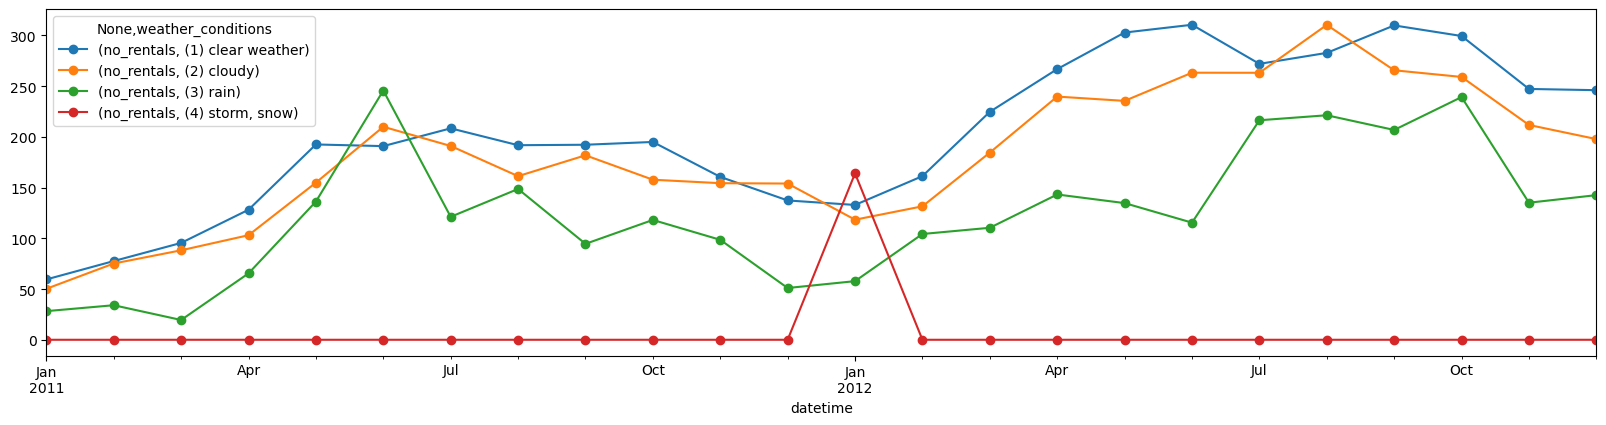

In [16]:
groupby_month_weather.plot(figsize = (20, 4.5), style = 'o-');




> All these steps have enabled us to represent the evolution over time of the average number of rentals, differentiating according to weather conditions.
> We can see that the better the weather conditions, the higher the average number of bike rentals. Indeed, the blue curve, which corresponds to clear weather, is above the others, while the red curve, which corresponds to extreme weather conditions, is above all the other curves.  
>
> It should also be noted that the variable **`“weather_conditions”`** depends on the weather and that weather conditions change depending on the month. It is entirely possible that in January 2012, bike rentals were higher when weather conditions reached extreme levels (modality `(4) storm, snow` on the red curve), given that there was a lot of missing data for this modality, which we have just replaced with the value $0$, and that the only existing values were in January. <br>
>
> Finally, we can also see that the blue curve is usually the one above the others. This means that bike rentals are higher when the weather is clear. This is not very surprising, as the weather in Porto is mostly good.




# Analysis of Qualitative and Temporal Variables

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("OilWell_Quali_Temporal.csv")
df.head()


## 1. Overview of qualitative variables

In [ ]:

categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


### Visualization of categorical distributions

In [ ]:

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols[:6], 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"{col} distribution")
plt.tight_layout()
plt.show()


## 2. Temporal analysis

In [ ]:

df['Production_Date'] = pd.to_datetime(df['Production_Date'])
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'])
df = df.sort_values('Production_Date')

df['Days_Since_Maintenance'] = (df['Production_Date'] - df['Last_Maintenance_Date']).dt.days
df[['Production_Date', 'Last_Maintenance_Date', 'Days_Since_Maintenance']].head()


### Visualization of temporal evolution

In [ ]:

plt.figure(figsize=(10,5))
sns.histplot(df['Days_Since_Maintenance'], bins=30, kde=True)
plt.title("Distribution of Days Since Last Maintenance")
plt.xlabel("Days since maintenance")
plt.ylabel("Count")
plt.show()


### Time trends by operator

In [ ]:

operator_trends = df.groupby(['Operator', pd.Grouper(key='Production_Date', freq='M')])['Days_Since_Maintenance'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=operator_trends, x='Production_Date', y='Days_Since_Maintenance', hue='Operator')
plt.title("Average Time Between Maintenance and Production per Operator")
plt.xlabel("Production Date")
plt.ylabel("Avg Days Since Maintenance")
plt.show()
